# EE 564 PROJECT #2

## BMW i3 Traction Motor Design


BMW i3 is a full-electric car, with a permanent magnet assisted hybrid-synchronous motor. In this project report, a similar engine satisfying the same performance criteria will be designed and reported.

**Useful Links:**

* [Manufacturer's web page of i3](http://www.bmw.com/com/en/newvehicles/i/i3/2013/showroom/drive.html)

* [A presentation on hybrid synchronous i3 motor](http://hybridfordonscentrum.se/wp-content/uploads/2014/05/20140404_BMW.pdf)

* [Videos and additional info on i3 motor production](http://insideevs.com/bmw-i3-production-process-videos-batteries-and-drivetrain/)

* [Comments on i3 performance](http://www.electric-vehiclenews.com/2014/06/bmw-i3-is-this-worlds-most-desirable.html)

## Machine Specifications

Since this is a commercial product, no source on BMW i3 motor fully describing its structure and properties has been found. However, from the data collected through the links provided above, it is possible to summarize the machine properties at a satisfactory level.

* Machine Type: Permanent Magnet Assisted Synchronous Reluctance Motor
* Rated Power: 75 kW
* Maximum Power: 125 kW
* Torque & Speed for Max. Power Condition: 250 Nm & 4500 rpm
* Weight: 65 kg
* 3-phase, 6-pole machine
* Two-layer magnet design
* Liquid Cooling

By processing the data above, additional specifications required for design can be obtained. No volume information has been found but assuming that the motor is completely iron, 65 kg of mass corresponds to 8,3 lt of volume. Considering the air gap, slots, windings, PMs and flux barriers which all have density well below iron, 9,5 lt volume seems to be a good approximation. Besides, we know from the provided links that the driver produces 400V sine wave which then corresponds to 110A phase current for rated power. 

* Volume: 9,5 lt
* 400 V, 110 A supply at rated condition.

Original torque-speed graph for the BMW motor is provided below:

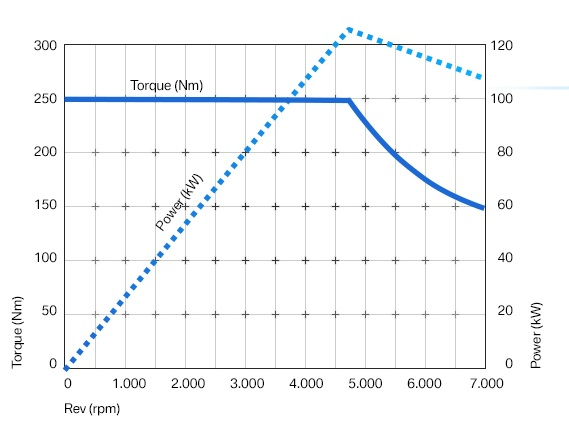

In [52]:
from IPython.display import Image
Image(filename='images/ts.jpg')

## Initial Sizing of the Rotor and Design Approach

In this study, +20% increased volume of the original commercial version will be assumed first. This will relieve tight limitations on the design. After the designed motor is simulated on computer, optimization and volume reduction efforts will be presented. In parallel to this, Chapter 6 of textbook is followed, which introduces a tangential stress based initial volume guess.

Considering the target design's overall volume of 9,5 lt, an initial rotor volume of 8 lt is assumed first.

From Table 6.2. Permitted Flux Densities (T)

* Air Gap: 0,95
* Stator Yoke: 1,5
* Tooth: 2
* Pole Core: 1,8

From Table 6.3. Current Density and Linear Current Density

* A: 50 kA/m
* J: 13 A/mm2 (due to liquid cooling)

Which corresponds to the tangential stress value of

* TangStr: 33000 Pa

By the relation, Torque = 2*TangStr*Volume, another value for volume turns out to be 3.8 lt which is well below 8 lt. This shows that our 8 lt rotor volume assumption will not violate basic design rules.

In [37]:
import math
Prated=75e3 #W
Trated=250 #Nm
p=6 #6 pole machine
pp=p/2 #pole pairs
Vrated=400 #V
Irated=110 #A
Vrotorinit=8000 #cm3
X=(math.pi/(4*pp))*math.sqrt(pp)
# X=l/D
dummy=Vrotorinit/(2*X*math.pi)
Rrotor=math.pow(dummy,0.3333)
Rrotor=round(Rrotor)
l=2*X*Rrotor
l=round(l)
Vrotor=math.pi*Rrotor*Rrotor*l
print Vrotor
print Rrotor
print l

8004.77808135
14.0
13.0


### Air Gap Sizing

Considering the power rating and pole number of the target machine, two formulas for the calculation of air gap will be used:

* g=(0.1 + 0.012*pole^1/3)

* g=(0.18 + 0.006*Prated^0.4)

First formula yields an air gap value of 0.6 mm. Second one yields 0.8 mm. Trusting in  german mechanical abilities, an air gap distance of g = 0.6 mm is assumed. Later, in the calculation of stator inner diameter, this air gap value will be further rounded to 0.5 mm.

### Stator Sizing and Windings - 1

In Table 6.7 of the textbook, it is stated that for large PMSM, slot pitch is expected to be 14-75 mm. Our machine is 3 phase, 6 pole. Let qs be the number of slots/pole/phase, and Qs be total number of slots. Since we already know the inner diameter of the stator (rotor diameter + 2 x airgap), following table is made:

qs:            2       3      4
Qs:            36     54      72
Slot Pitch:   24.5   16.35   12.25

Considering Table 6.7 of textbook, Qs=36 and qs=2 is selected.

Now, important parameters such as number of turns in a slot, number of turns per phase etc.. should be found. Usually, a flux assumption based analysis is carried out to find the number of turns as in the case of induction machine design covered in class. However, in this study a different way is followed: the motor has been run at its rated speed with zero excitation. Since there are magnets in the rotor, it is expected to produce its rated voltage at stator terminals.

* Ephase=4.44 x Nphase x f x flux

Note that at this condition, Nphase is the only parameter for our case. Therefore, with a trial and error approach and very few iterations, it was found that Nphase = 36 and turns in a slot = 6 values should be adopted. The induced voltage graph for the aforementioned condition is given below. (Remember Vphase is 400V rms l-l which corresponds to 327 V peak l-n)


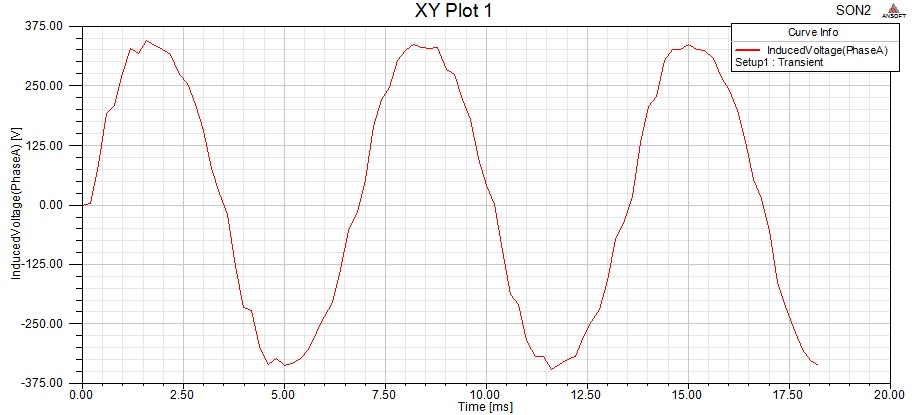

In [45]:
from IPython.display import Image
Image(filename='images/indvolt.jpg')

### Stator Sizing and Windings - 2

Having decided qs=2, Qs=36, double layer winding, Nphase=36 and Ncoil=3, the stator geometry assumed for the stator is given below. Its dimensions in mm are:

Hs0 = 1

Hs1 = 5

Hs2 = 18

Bs0 = 8

Bs1 = 11

Bs2 = 15


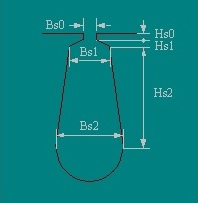

In [44]:
from IPython.display import Image
Image(filename='images/slot2.jpg')

### Stator Sizing and Windings - 3

The slot geometry shown above has approximately 250 mm2 area. With a fill factor assumption of 0.4, the effective area that can be used for copper wires is 100 mm2.

Rated current is 110 A. With a +10% safety margin, this value can be taken as 120 A for conductor sizing. Assuming a high value such as 8 A/mm2 for conductors (since we have liquid cooling) , required conductor area is 15 mm2. This can be obtained by paralleling 3 AWG10 wires which totally results in 15.8 m2 conductor area. Note that our rated frequency is 150 Hz for a 6 pole machine running at 3000 rpm therefore three wires are paralleled to reduce skin effect. 3 turns of 3 paralleled AWG10 wires yields a conductor area of 47.4 mm2. For a double layer stator configuration 95 mm2 slot area is needed, which is satisfied with our configuration.

Winding distribution of the stator is illustrated below. With a double layer winding arrangement, our machine is 5/6 pitched as can be seen the winding distribution image.


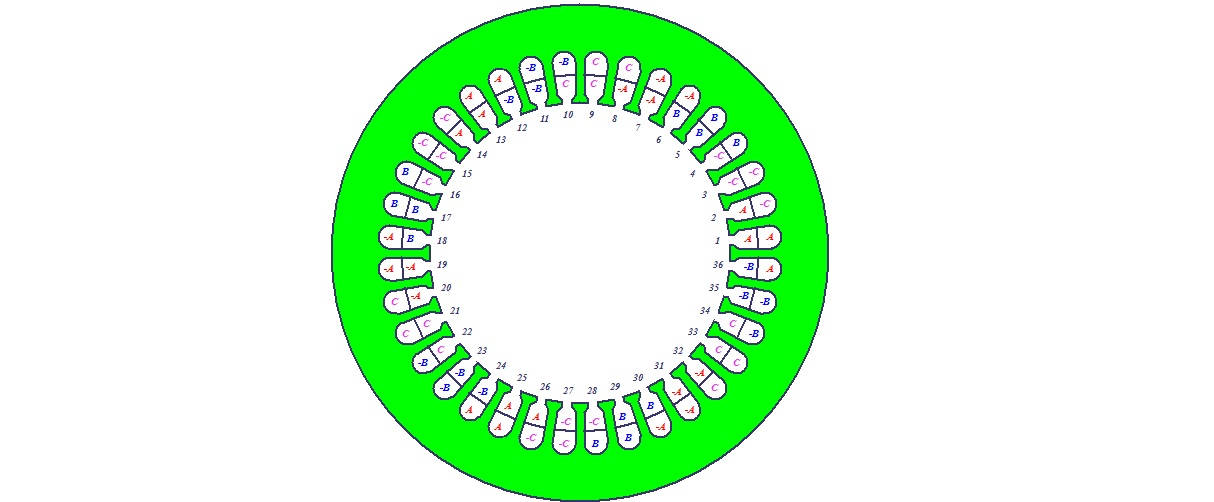

In [46]:
from IPython.display import Image
Image(filename='images/winding.jpg')

### Ansoft Maxwell Computer Simulation -1

Ansoft Maxwell (which is surprisingly designed for Windows) has been utilized for the computer simulations of this study. An illustration of the motor's physical structure is provided below. When all the necessary parameters are entered in such a way that no rule violations exist, the program creates a model to work on utilizing the symmetry of the motor structure. Since the motor has 6 poles, this corresponds to a 60 degree slice, which is also shown below.


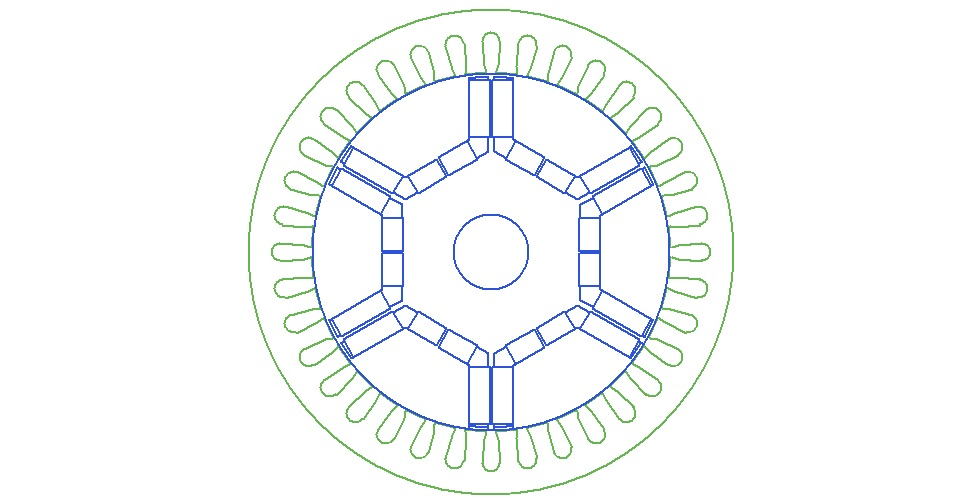

In [48]:
from IPython.display import Image
Image(filename='images/motor.jpg')

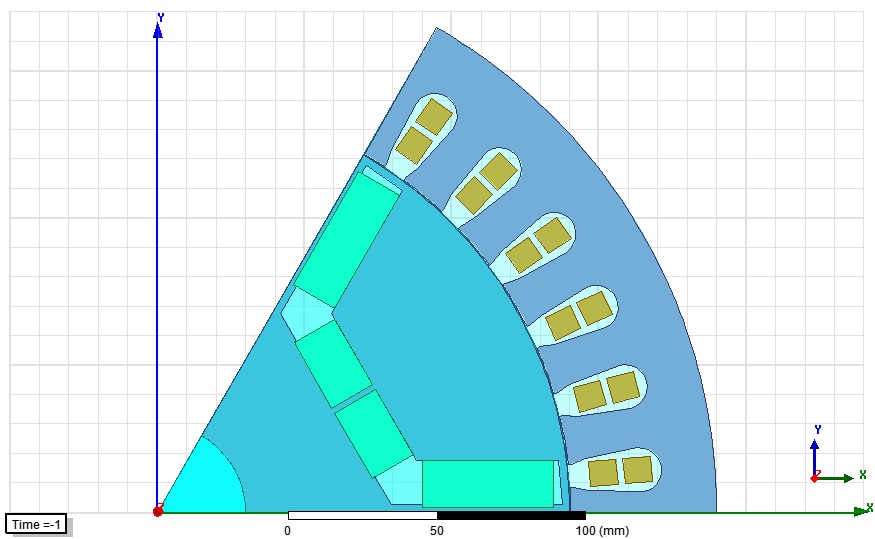

In [49]:
from IPython.display import Image
Image(filename='images/model.jpg')

### Ansoft Maxwell Computer Simulation - 2

Torque versus time graph for 3000 rpm rated rotor speed is provided below. To obtain this, balanced three phase currents are fed into the armature, which was found to be the easiest way. For 3000 rpm and p=6, frequency of the supply current should be 150 Hz. Designed motor is capable of producing 250 Nm torque at its rated speed satisfying the design criteria. From the graph, 20% torque ripple is observed which can be found to be large. Although the design can be further optimized for better performance, this stems from the saliency of the motor and PM assisted SM are not famous for smooth torque production. A copy of the simulation file has been included in the project folder.

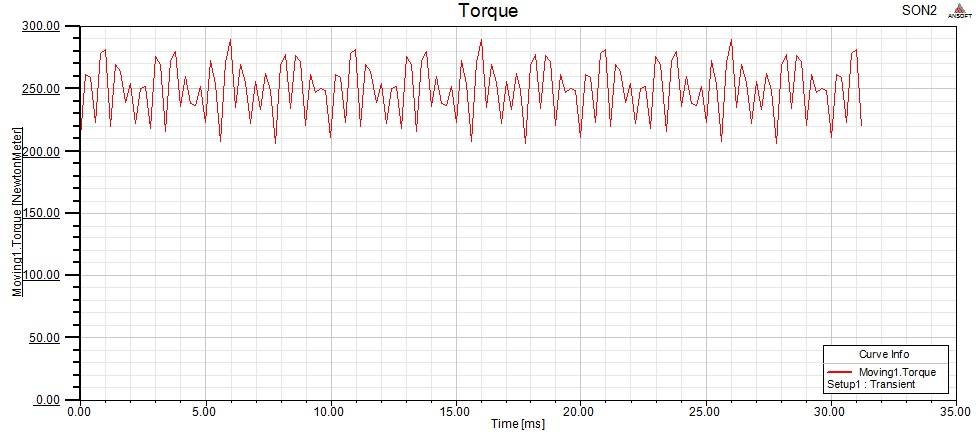

In [50]:
from IPython.display import Image
Image(filename='images/torque.jpg')